<a href="https://colab.research.google.com/github/ernerdgn/Pusula_Eren_Erdogan/blob/main/Pusula_DSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# get data set
#https://github.com/ernerdgn/Pusula_Eren_Erdogan/raw/refs/heads/main/Talent_Academy_Case_DT_2025.xlsx

github_raw_url = 'https://github.com/ernerdgn/Pusula_Eren_Erdogan/raw/refs/heads/main/Talent_Academy_Case_DT_2025.xlsx'

!wget -O 'Talent_Academy_Case_DT_2025.xlsx' {github_raw_url}

# Setting up the environment

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Visual customization for plots

In [ ]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

Loading data

In [ ]:
file_path = "Talent_Academy_Case_DT_2025.xlsx"
df = pd.read_excel(file_path)

# First phase: EDA

## Initial ispection of the raw data

In [ ]:
print("=== FIRST 5 ROWS OF DATA ===")
print(df.head())
print("\n" + "=" * 50 + "\n")

#

print("=== DATAFRAME INFO ===")
df.info()
print("\n" + "=" * 50 + "\n")

#

print("=== DATASET SHAPE ===")
print(f"dataset got {df.shape[0]} rows and {df.shape[1]} columns")
print("\n" + "=" * 50 + "\n")

=== FIRST 5 ROWS OF DATA ===
   HastaNo  Yas Cinsiyet KanGrubu    Uyruk  \
0   145134   60    Kadın    0 Rh+  Türkiye   
1   145135   28    Erkek    0 Rh+  Türkiye   
2   145135   28    Erkek    0 Rh+  Türkiye   
3   145135   28    Erkek    0 Rh+  Türkiye   
4   145135   28    Erkek    0 Rh+  Türkiye   

                                      KronikHastalik  \
0  Becker Musküler Distrofisi, Hiportiroidizm, Ka...   
1  Duchenne Musküler Distrofisi, Myastenia gravis...   
2  Duchenne Musküler Distrofisi, Myastenia gravis...   
3  Duchenne Musküler Distrofisi, Myastenia gravis...   
4  Duchenne Musküler Distrofisi, Myastenia gravis...   

                                            Bolum Alerji  \
0  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    TOZ   
1  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   
2  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   
3  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   
4  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN 

### Handle duplicates

In [ ]:
duplicate_count = df.duplicated().sum()
print("=== DUPLICATE ROWS CHECK ===")
print(f"found {duplicate_count} duplicate rows")

duplicate_rows = df[df.duplicated(keep=False)]  # to keep original and duplicates together

sorted_duplicates = duplicate_rows.sort_values(by=['HastaNo', 'TedaviAdi', 'UygulamaYerleri'])  # sorting

print(f"=== sample from {duplicate_count} duplicate rows ===")
print(sorted_duplicates.head(10))  # display first 10

df.drop_duplicates(inplace=True)

print("\n" + "=" * 50 + "\n")
print(f"Shape of the dataset after dropping duplicates: {df.shape}")

=== DUPLICATE ROWS CHECK ===
found 928 duplicate rows
=== sample from 928 duplicate rows ===
    HastaNo  Yas Cinsiyet KanGrubu    Uyruk  \
1    145135   28    Erkek    0 Rh+  Türkiye   
5    145135   28    Erkek    0 Rh+  Türkiye   
2    145135   28    Erkek    0 Rh+  Türkiye   
4    145135   28    Erkek    0 Rh+  Türkiye   
7    145136   60    Erkek    0 Rh+  Türkiye   
8    145136   60    Erkek    0 Rh+  Türkiye   
10   145137   65    Kadın    0 Rh+  Türkiye   
11   145137   65    Kadın    0 Rh+  Türkiye   
14   145137   65    Kadın    0 Rh+  Türkiye   
16   145137   65    Kadın    0 Rh+  Türkiye   

                                       KronikHastalik  \
1   Duchenne Musküler Distrofisi, Myastenia gravis...   
5   Duchenne Musküler Distrofisi, Myastenia gravis...   
2   Duchenne Musküler Distrofisi, Myastenia gravis...   
4   Duchenne Musküler Distrofisi, Myastenia gravis...   
7                                                 NaN   
8                                              

## Univariate analysis

### Numerical Features

*numerical features, cleaning the data*
converting `TedaviSuresi` and `UygulamaSuresi` to numeric type

In [ ]:
# extracting numbers
df['TedaviSuresi_sayisal'] = pd.to_numeric(df['TedaviSuresi'].str.extract('(\\d+)', expand=False))
df['UygulamaSuresi_sayisal'] = pd.to_numeric(df['UygulamaSuresi'].str.extract('(\\d+)', expand=False))

Calculating descriptive statistics

In [ ]:
numerical_columns = ['Yas', 'TedaviSuresi_sayisal', 'UygulamaSuresi_sayisal']  # selecting new numeric params
descriptive_stats = df[numerical_columns].describe()

In [ ]:
print("=== descriptive stats of numeric features ===")
print(descriptive_stats)

=== descriptive stats of numeric features ===
               Yas  TedaviSuresi_sayisal  UygulamaSuresi_sayisal
count  1307.000000           1307.000000             1307.000000
mean     47.291507             14.231064               14.335119
std      15.424070              4.153470                7.250982
min       2.000000              1.000000                3.000000
25%      38.000000             15.000000                5.000000
50%      46.000000             15.000000               20.000000
75%      56.000000             15.000000               20.000000
max      92.000000             37.000000               45.000000


Checking missing data in the new columns

In [ ]:
print("\n" + "=" * 50 + "\n")
print("=== missing values in new columns ===")
print(df[numerical_columns].isnull().sum())



=== missing values in new columns ===
Yas                       0
TedaviSuresi_sayisal      0
UygulamaSuresi_sayisal    0
dtype: int64


*visualization of numerical features*
*   histograms for distribution
*   box plots for quartiles and outliers




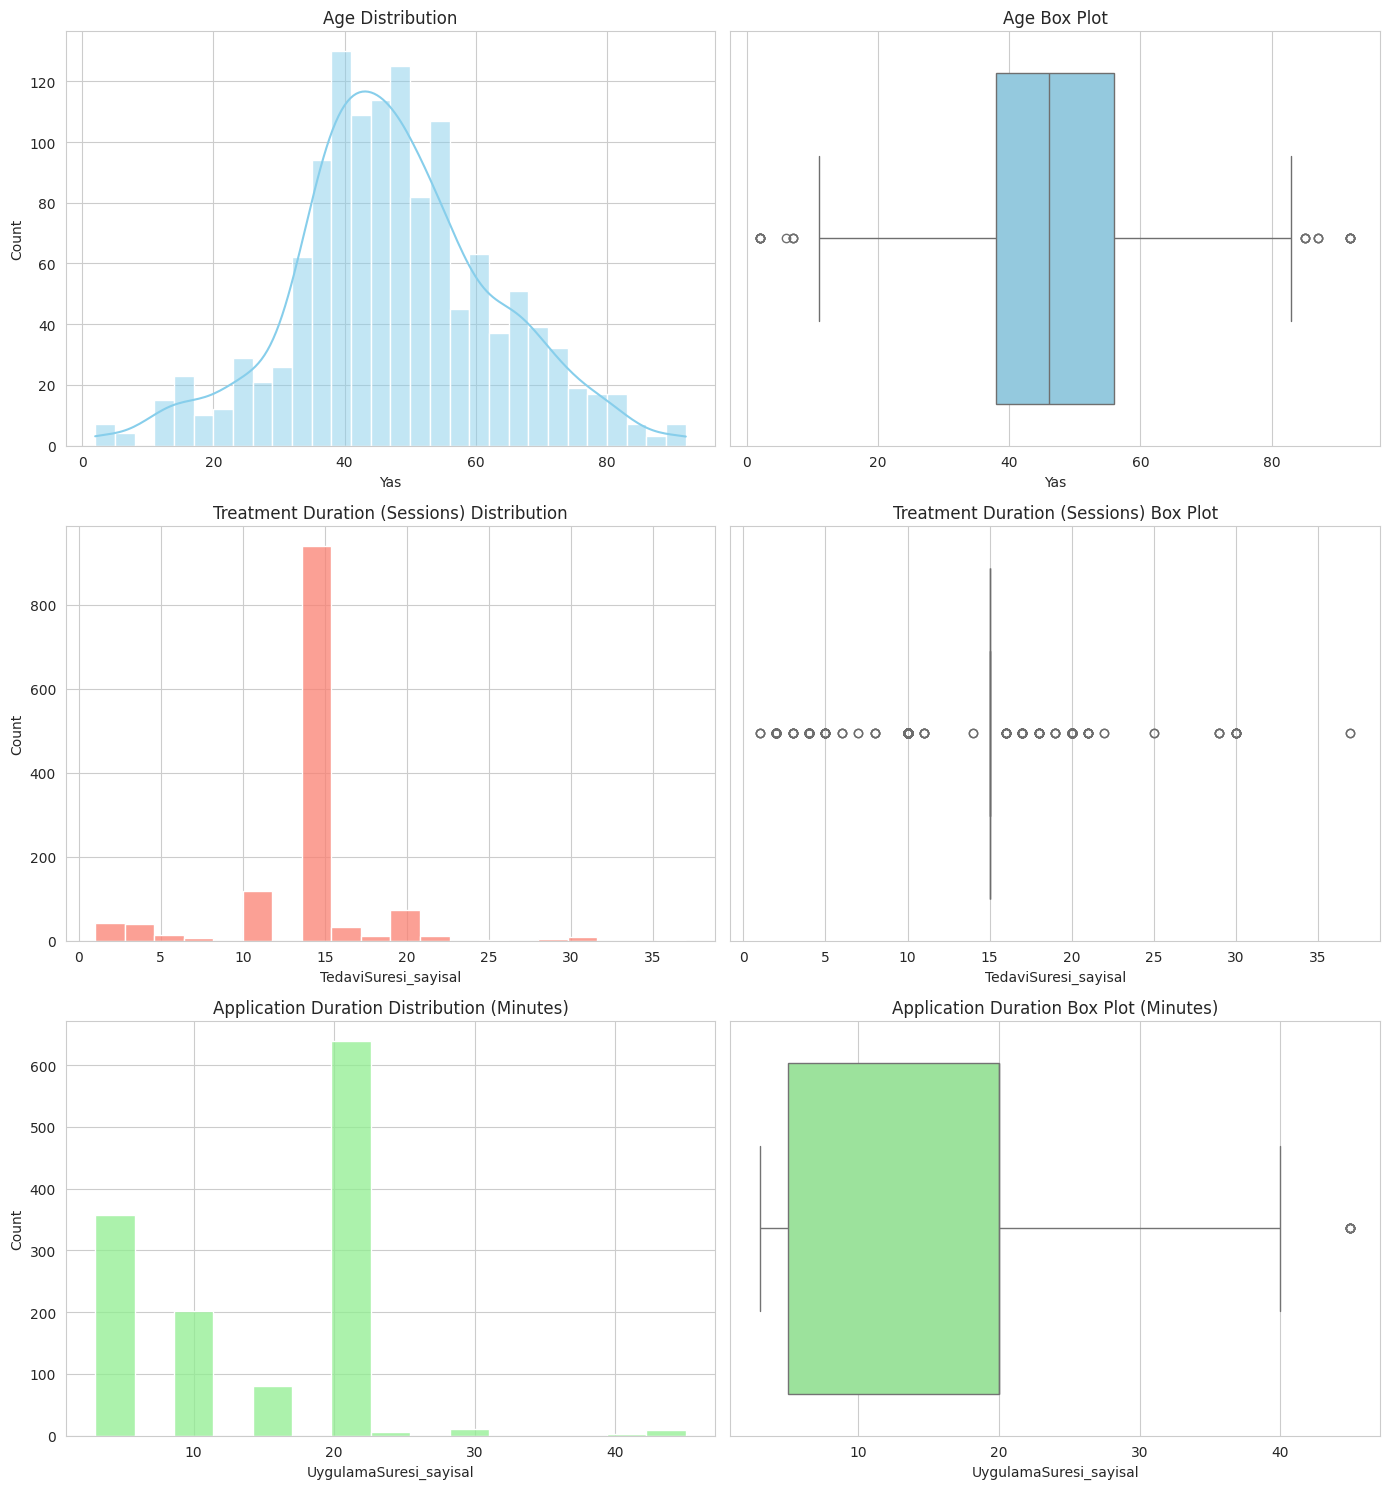

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(14, 15))  # creating figures

# age
# histogram
sns.histplot(df['Yas'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Distribution')
# box plot
sns.boxplot(x=df['Yas'], ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Age Box Plot')

# treatmentDuration
# histogram
sns.histplot(df['TedaviSuresi_sayisal'], bins=20, kde=False, ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Treatment Duration (Sessions) Distribution')
# box Plot
sns.boxplot(x=df['TedaviSuresi_sayisal'], ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('Treatment Duration (Sessions) Box Plot')

# applicationDuration
# histogram
sns.histplot(df['UygulamaSuresi_sayisal'], bins=15, kde=False, ax=axes[2, 0], color='lightgreen')
axes[2, 0].set_title('Application Duration Distribution (Minutes)')
# box plot
sns.boxplot(x=df['UygulamaSuresi_sayisal'], ax=axes[2, 1], color='lightgreen')
axes[2, 1].set_title('Application Duration Box Plot (Minutes)')

plt.tight_layout()  # preventing overlapping
plt.show()


### Categorical features

/tmp/ipython-input-1727243528.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-1727243528.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-1727243528.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


=== Value Counts for Cinsiyet ===
Cinsiyet
Kadın    723
Erkek    480
Name: count, dtype: int64


=== Value Counts for KanGrubu ===
KanGrubu
0 Rh+     353
A Rh+     321
B Rh+     124
AB Rh+     51
B Rh-      41
A Rh-      29
0 Rh-      17
AB Rh-      6
Name: count, dtype: int64


=== Value Counts for Uyruk ===
Uyruk
Türkiye       1268
Tokelau         16
Arnavutluk      10
Azerbaycan       8
Libya            5
Name: count, dtype: int64


=== Value Counts for Bolum ===
Bolum
Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    1157
Ortopedi Ve Travmatoloji                            78
İç Hastalıkları                                     22
Nöroloji                                            13
Kardiyoloji                                          9
Genel Cerrahi                                        5
Laboratuar                                           5
Göğüs Hastalıkları                                   5
Tıbbi Onkoloji                                       4
Kalp Ve Damar Cerrahisi     

/tmp/ipython-input-1727243528.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


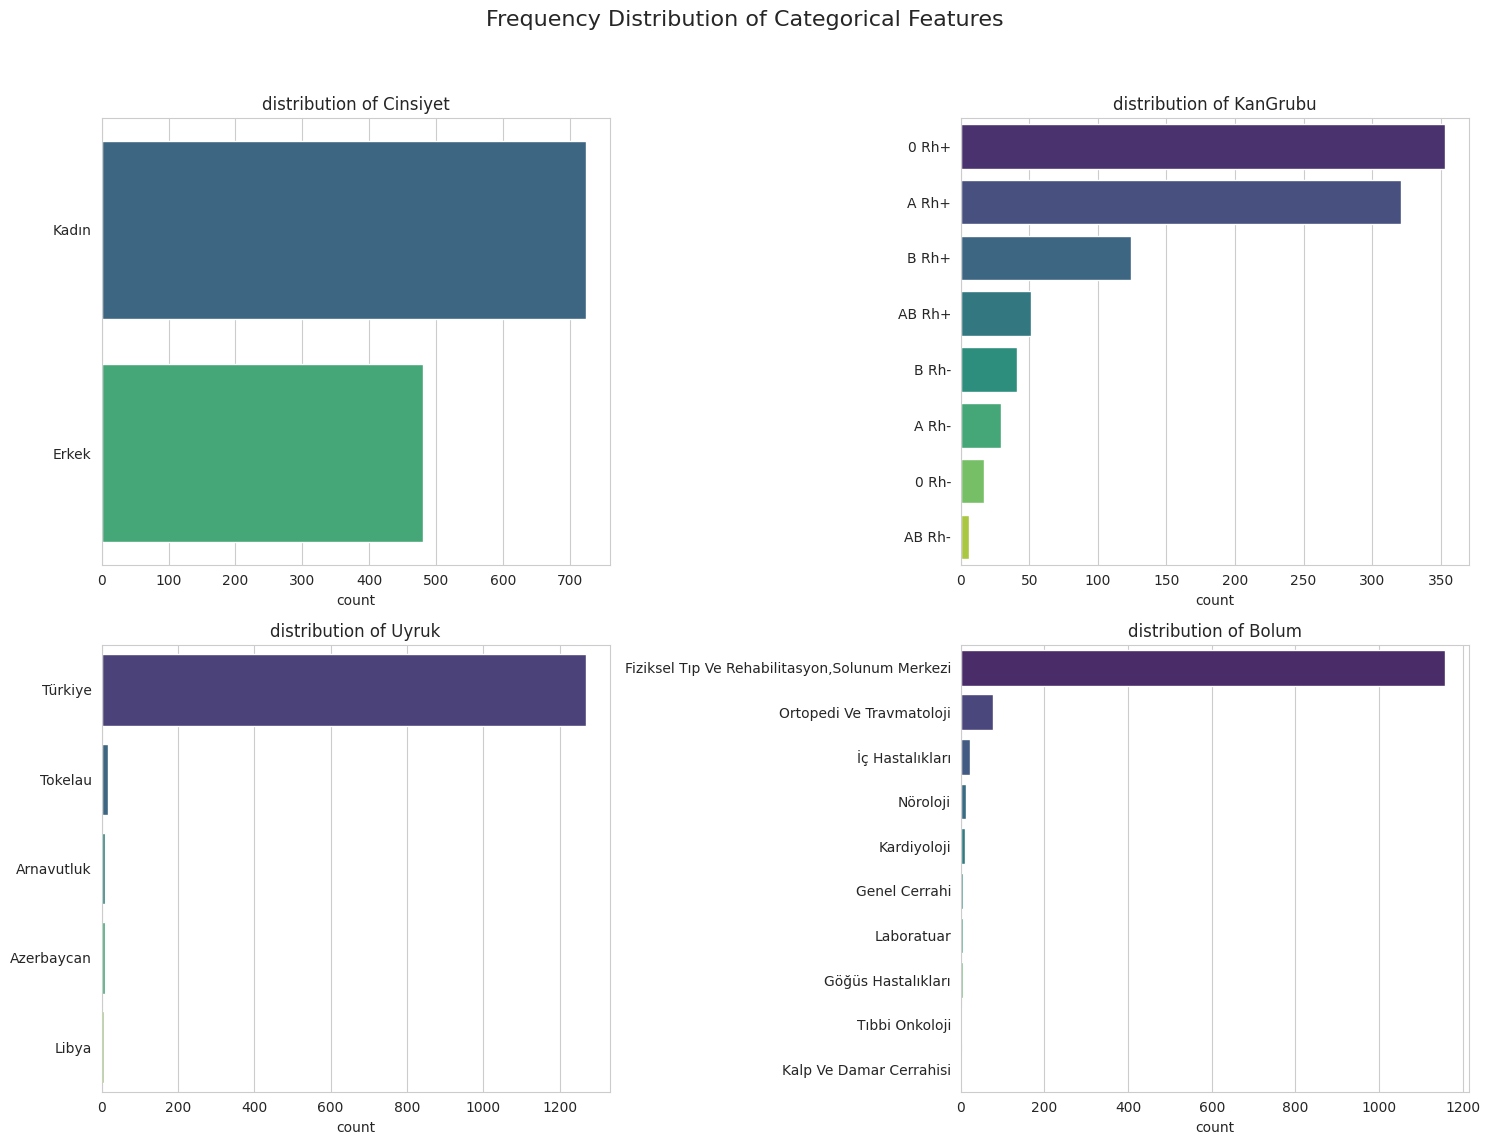

In [ ]:
categorical_features = ['Cinsiyet', 'KanGrubu', 'Uyruk', 'Bolum']

# creating figure
plt.figure(figsize=(15, 12))
plt.suptitle('Frequency Distribution of Categorical Features', fontsize=16)

for i, col in enumerate(categorical_features):
  plt.subplot(2, 2, i + 1)
  ax = sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
  ax.set_title(f'distribution of {col}')
  ax.set_xlabel('count')
  ax.set_ylabel('')

  print(f"=== Value Counts for {col} ===")
  print(df[col].value_counts())
  print("\n" + "="*50 + "\n")

plt.tight_layout(rect = [0, .03, 1, .95])
plt.show()

### High-cardinality features

standardizing the text for each to see any synonyms/typos

**KronikHastalik**

In [ ]:
unique_kronik_hastalik = sorted(df['KronikHastalik'].dropna().str.split(',').explode().str.strip().str.lower().unique())

print("=== unique chronic conditions ===")
print(f"Found {len(unique_kronik_hastalik)} unique conditions")

for i in range(0, len(unique_kronik_hastalik), 5): # sample
  print(', \n'.join(unique_kronik_hastalik[i:i+5]))

=== unique chronic conditions ===
Found 15 unique conditions
aritmi, 
astım, 
becker musküler distrofisi, 
diyabet, 
duchenne musküler distrofisi
fascioscapulohumeral distrofi, 
guatr, 
hipertansiyon, 
hipertiroidizm, 
hiportiroidizm
hipotirodizm, 
kalp yetmezliği, 
limb-girdle musküler distrofi, 
myastenia gravis, 
polimiyozit


handling the typos for `KronikHastalik`  

*   `hiportiroidizm` - `hipotirodizm`: correcting as `hipotiroidizm`

In [ ]:
df['KronikHastalik'] = df['KronikHastalik'].str.replace('hiportiroidizm', 'hipotiroidizm', case=False)
df['KronikHastalik'] = df['KronikHastalik'].str.replace('hipotirodizm', 'hipotiroidizm', case=False)

# verify
unique_kronik_hastalik_after = sorted(df['KronikHastalik'].dropna().str.split(',').explode().str.strip().str.lower().unique())

print(f"num unique cond. AFTER cleaning: {len(unique_kronik_hastalik_after)}")
print("\nfinal list:")

print(unique_kronik_hastalik_after)

num unique cond. AFTER cleaning: 14

final list:
['aritmi', 'astım', 'becker musküler distrofisi', 'diyabet', 'duchenne musküler distrofisi', 'fascioscapulohumeral distrofi', 'guatr', 'hipertansiyon', 'hipertiroidizm', 'hipotiroidizm', 'kalp yetmezliği', 'limb-girdle musküler distrofi', 'myastenia gravis', 'polimiyozit']


**Alerji**

In [ ]:
unique_alerji = sorted(df['Alerji'].dropna().str.split(',').explode().str.strip().str.lower().unique())

print("=== unique allergies ===")
print(f"{len(unique_alerji)} unique allergies")
print(unique_alerji)

=== unique allergies ===
11 unique allergies
['arveles', 'coraspin', 'gripin', 'gri̇pi̇n', 'novalgin', 'polen', 'sucuk', 'toz', 'voltaren', 'volteren', 'yer fıstığı']


handling the typos for `Alerji`

* `gri̇pi̇n` to `gripin`
* `volteren` to `voltaren`

In [ ]:
df['Alerji'] = df['Alerji'].str.lower()

# "gri̇pi̇n" to "gripin"
df['Alerji'] = df['Alerji'].str.replace('gri̇pi̇n', 'gripin', case=False)

# "volteren" to "voltaren"
df['Alerji'] = df['Alerji'].str.replace('volteren', 'voltaren')

# verify
unique_alerji_after = sorted(df['Alerji'].dropna().str.split(',').explode().str.strip().unique())

print(f"\n num unique allergies AFTER cleaning: {len(unique_alerji_after)}")
print("\n===final unique allergies ===")
print(unique_alerji_after)


 num unique allergies AFTER cleaning: 9

===final unique allergies ===
['arveles', 'coraspin', 'gripin', 'novalgin', 'polen', 'sucuk', 'toz', 'voltaren', 'yer fıstığı']


**Tanilar**

In [ ]:
unique_tanilar = sorted(df['Tanilar'].dropna().str.split(',').explode().str.strip().str.lower().unique())

print("=== unique diagnoses ===")
print(f"found {len(unique_tanilar)} unique diagnoses")

for i in range(0, len(unique_tanilar), 3):
  print(','.join(unique_tanilar[i:i+3]))

=== unique diagnoses ===
found 285 unique diagnoses
,'dorsalji̇,akromiyoklavikuler eklem burkulma ve gerilmesi
akut apandisit,akut peptik ülser,algonörodistrofi
allerjik rinit,alt ekstremite mononöropatileri,anksiyete bozukluğu
anüs ve rektumun diğer tanımlanmış hastalıkları,aort stenozu,arti̇küler kikirdak di̇ğer bozukluklari
artroz,astım,aterosklerotik kardiyovasküler hastalık
atrial fibrilasyon ve flutter,ayak bileği hariç,ayak bileği ve ayak
ayak bileği ve ayak düzeyinde derin peroneal sinir yaralanması,ayak bileği ve ayak düzeyinde eklem ve ligamentlerin çıkık,ayak bileği ve ayak düzeyinde kas ve tendon yaralanması
ayak bileği ve ayağın diğer ve tanımlanmamış yaralanmaları,ayak bileği ve ayağın yüzeysel yaralanması,ayak kırığı
ayak ve ayak bileği,aşil tendiniti,aşil tendon yaralanması
bacak,baldır düzeyinde peroneal sinir yaralanması,baş ağrısı
başka yerde sınıflanmamış,başka yerde sınıflanmış diğer hastalıklarda,başka yerde sınıflanmış hastalıklarda
bel ağrısı,bell palsisi,benign

In [ ]:
# get most repeated 15
top_15_raw_diagnoses = df['Tanilar'].dropna().str.split(',').explode().str.strip().value_counts().nlargest(15)

print("--- Top 15 Most Common Diagnoses (Before Any Cleaning) ---")
print(top_15_raw_diagnoses)

--- Top 15 Most Common Diagnoses (Before Any Cleaning) ---
Tanilar
DORSALJİ                            376
DİĞER                               364
tanımlanmamış                       220
Omuzun darbe sendromu               162
İntervertebral disk bozuklukları    129
LUMBOSAKRAL BÖLGE                   128
SERVİKOTORASİK BÖLGE                118
SERVİKAL BÖLGE                       90
Eklem ağrısı                         68
diğer                                57
Dorsalji                             57
                                     45
Menisküs yırtığı                     37
şimdiki                              37
Ekstremite ağrısı                    36
Name: count, dtype: int64


In [ ]:
# i typo
# .str.replace('i̇', 'i')
df['Tanilar_cleaned'] = df['Tanilar'].str.lower().str.replace('i̇', 'i')

cleaned_top_15 = df['Tanilar_cleaned'].dropna().str.split(',').explode().str.strip().value_counts().nlargest(15)

print("=== diagnoses after i thing ===")
print(cleaned_top_15)

=== diagnoses after i thing ===
Tanilar_cleaned
dorsalji                            433
diğer                               422
tanımlanmamış                       220
omuzun darbe sendromu               163
intervertebral disk bozuklukları    130
lumbosakral bölge                   129
servikotorasik bölge                118
servikal bölge                       90
eklem ağrısı                         68
                                     45
birden fazla yer                     44
menisküs yırtığı                     37
şimdiki                              37
ekstremite ağrısı                    36
fibromiyalji                         35
Name: count, dtype: int64


In [ ]:
if 'Tanilar_cleaned' not in df.columns: # ensure
  df['Tanilar_cleaned'] = df['Tanilar'].str.lower().str.replace('i̇', 'i')

all_diagnoses_counts = df['Tanilar_cleaned'].dropna().str.split(',').explode().str.strip().value_counts()  # val count flag

unwanted_items = ['', 'şimdiki']
filtered_counts = all_diagnoses_counts.drop(labels=unwanted_items, errors='ignore')

final_top_15 = filtered_counts.nlargest(15)  # get new list

print("=== diagnoses after removed unnec. entries ===")
print(final_top_15)

=== diagnoses after removed unnec. entries ===
Tanilar_cleaned
dorsalji                             433
diğer                                422
tanımlanmamış                        220
omuzun darbe sendromu                163
intervertebral disk bozuklukları     130
lumbosakral bölge                    129
servikotorasik bölge                 118
servikal bölge                        90
eklem ağrısı                          68
birden fazla yer                      44
menisküs yırtığı                      37
ekstremite ağrısı                     36
fibromiyalji                          35
gonartroz [diz ekleminin artrozu]     33
lateral epikondilit                   33
Name: count, dtype: int64


**TedaviAdi**

In [ ]:
df['TedaviAdi_cleaned'] = df['TedaviAdi'].str.lower().str.replace('i̇', 'i')

unique_tedavi = sorted(df['TedaviAdi_cleaned'].dropna().str.split(',').explode().str.strip().unique())

print("=== treatment name unique ===")
print(f"=> {len(unique_tedavi)} unique treatment names")

for i in range(0, len(unique_tedavi), 3):
  print(', '.join(unique_tedavi[i:i+3]))

=== treatment name unique ===
=> 235 unique treatment names
, 1. parmak bağ ve volar plak yaralanması, 1. parmak cmc eklem ağrısı
5. metatars fissürü+bağ lezyonu, aksiller web sendromu+kontraktür, algonörodistrofi sol ayak
algonörodistrofi sol el, alt ekstremite atrofi+yürüme, alt ekstremite atrofi-
alt ekstremite atrofi-bilateral, artroskopi diz tam yükle mobilizasyon, ataksi reh
ayak bileği, ayak bileği distorsiyonu, ayak bileği distorsiyonu-1
ayak bileği distorsiyonu-2, ayak bileği kontraktürü, ayak bileği post op
aşil ameliyatı erken, aşil kısalığı, aşil rüptürü op
aşil rüptürü rehabilitasyonu, aşil rüptürü-1, aşil rüptürü-2
aşil tamiri, aşil tendiniti sol-1, aşil tendiniti sol-2
baker kisti rüptürü, bel, bel ftr
beyin kanaması+atrofi, bialetarl diz implantı-erken rehabilitasyon, bilarteral implant-erken rehabilitasyon
bilateral diz eklem implantı, boyun, boyun-düşük kol
boyun-sırt ağrısı, boyun-trapezz, deneme
dirsek eklem çıkığı+kontraktürü, diz ağrısı, diz implantı
diz menisküs,

In [ ]:
top_15_raw_tedavi = df['TedaviAdi'].dropna().str.split(',').explode().str.strip().value_counts().nlargest(15)

print("=== top list of treatment names (before cleaning) ===")
print(top_15_raw_tedavi)

=== top list of treatment names (before cleaning) ===
TedaviAdi
Dorsalji -Boyun+trapez             120
İV DİSK BOZUKLUĞU-BEL              104
Dorsalji 1                          59
Dorsalji-Bel                        56
Gonartroz-Meniskopati               54
SAĞ OMUZ İMPİNGEMENT                46
Sol omuz İmpingement                33
Dorsalji-Dorsal                     30
Boyun-Trapezz                       29
Alt ekstremite atrofi-Bilateral     28
Dorsalji Boyun 1                    17
impingement sağ                     15
Sol Omuz İmpingement                14
Skolyoz                             13
MENİSKÜS TAMİRİ                     12
Name: count, dtype: int64


In [ ]:
# str.replace('i̇', 'i')
df['TedaviAdi_cleaned'] = df['TedaviAdi'].str.lower().str.replace('i̇', 'i')

cleaned_top_15_tedavi = df['TedaviAdi_cleaned'].dropna().str.split(',').explode().str.strip().value_counts().nlargest(15)

print("=== top list of treatment names ===")
print(cleaned_top_15_tedavi)

=== top list of treatment names ===
TedaviAdi_cleaned
dorsalji -boyun+trapez             120
iv disk bozukluğu-bel              104
dorsalji 1                          59
sol omuz impingement                57
dorsalji-bel                        56
gonartroz-meniskopati               54
sağ omuz impingement                52
dorsalji-dorsal                     30
boyun-trapezz                       29
alt ekstremite atrofi-bilateral     28
impingement sağ                     22
dorsalji boyun 1                    17
skolyoz                             13
menisküs tamiri                     12
diz op-erken rehabilitasyon         10
Name: count, dtype: int64


**UygulamaYerleri**

In [ ]:
# str.replace('i̇', 'i')
df['UygulamaYerleri_cleaned'] = df['UygulamaYerleri'].str.lower().str.replace('i̇', 'i')

unique_uygulama_yerleri = sorted(df['UygulamaYerleri_cleaned'].dropna().str.split(',').explode().str.strip().unique())

print("--- All Unique, Cleaned Application Sites ---")
print(f"=> {len(unique_uygulama_yerleri)} unique application sites")

for i in range(0, len(unique_uygulama_yerleri), 4):
  print(', '.join(unique_uygulama_yerleri[i:i+4]))

--- All Unique, Cleaned Application Sites ---
=> 23 unique application sites
ayak bileği, bel, boyun, dirsek
diz, el bilek, kalça, omuz
sağ ayak bileği bölgesi, sağ dirsek bölgesi, sağ diz bölgesi, sağ el bilek bölgesi
sağ kalça bölgesi, sağ omuz bölgesi, sol ayak bileği bölgesi, sol dirsek bölgesi
sol diz bölgesi, sol el bilek bölgesi, sol kalça bölgesi, sol omuz bölgesi
sırt, tüm vücut bölgesi, yüz


plotting high-cardinality features

In [ ]:
# this check is needed ?
if 'KronikHastalik_cleaned' not in df.columns:
  df['KronikHastalik_cleaned'] = df['KronikHastalik'].str.lower().str.replace('i̇', 'i').str.replace('hiportiroidizm', 'hipotirodizm')
if 'Alerji_cleaned' not in df.columns:
  df['Alerji_cleaned'] = df['Alerji'].str.lower().str.replace('i̇', 'i').str.replace('volteren', 'voltaren')
if 'Tanilar_cleaned' not in df.columns:
  df['Tanilar_cleaned'] = df['Tanilar'].str.lower().str.replace('i̇', 'i')
if 'TedaviAdi_cleaned' not in df.columns:
  df['TedaviAdi_cleaned'] = df['TedaviAdi'].str.lower().str.replace('i̇', 'i')
if 'UygulamaYerleri_cleaned' not in df.columns:
  df['UygulamaYerleri_cleaned'] = df['UygulamaYerleri'].str.lower().str.replace('i̇', 'i')

In [ ]:
all_diagnoses_counts = df['Tanilar_cleaned'].dropna().str.split(',').explode().str.strip().value_counts()
unwanted_items = ['', 'şimdiki']
filtered_diagnoses_counts = all_diagnoses_counts.drop(labels=unwanted_items, errors='ignore')

top_tanilar = filtered_diagnoses_counts.nlargest(15)  # tani

top_tedavi = df['TedaviAdi_cleaned'].dropna().str.split(',').explode().str.strip().value_counts().nlargest(15)  # tedavi_adi

top_uygulama_yerleri = df['UygulamaYerleri_cleaned'].dropna().str.split(',').explode().str.strip().value_counts().nlargest(15)  # uyg yerleri

top_kronik_hastalik = df['KronikHastalik_cleaned'].dropna().str.split(',').explode().str.strip().value_counts().nlargest(10)  # kronik

top_alerji = df['Alerji_cleaned'].dropna().str.split(',').explode().str.strip().value_counts().nlargest(10)  # alerji

/tmp/ipython-input-2044624703.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], x=top_tanilar.values, y=top_tanilar.index, palette='magma')
/tmp/ipython-input-2044624703.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], x=top_tedavi.values, y=top_tedavi.index, palette='viridis')
/tmp/ipython-input-2044624703.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 0], x=top_uygulama_yerleri.values, y=top_uygulama_yerleri.index, palette='plasma')
/tmp/ipython-input-2044624703.py:21: FutureWarning: 

P

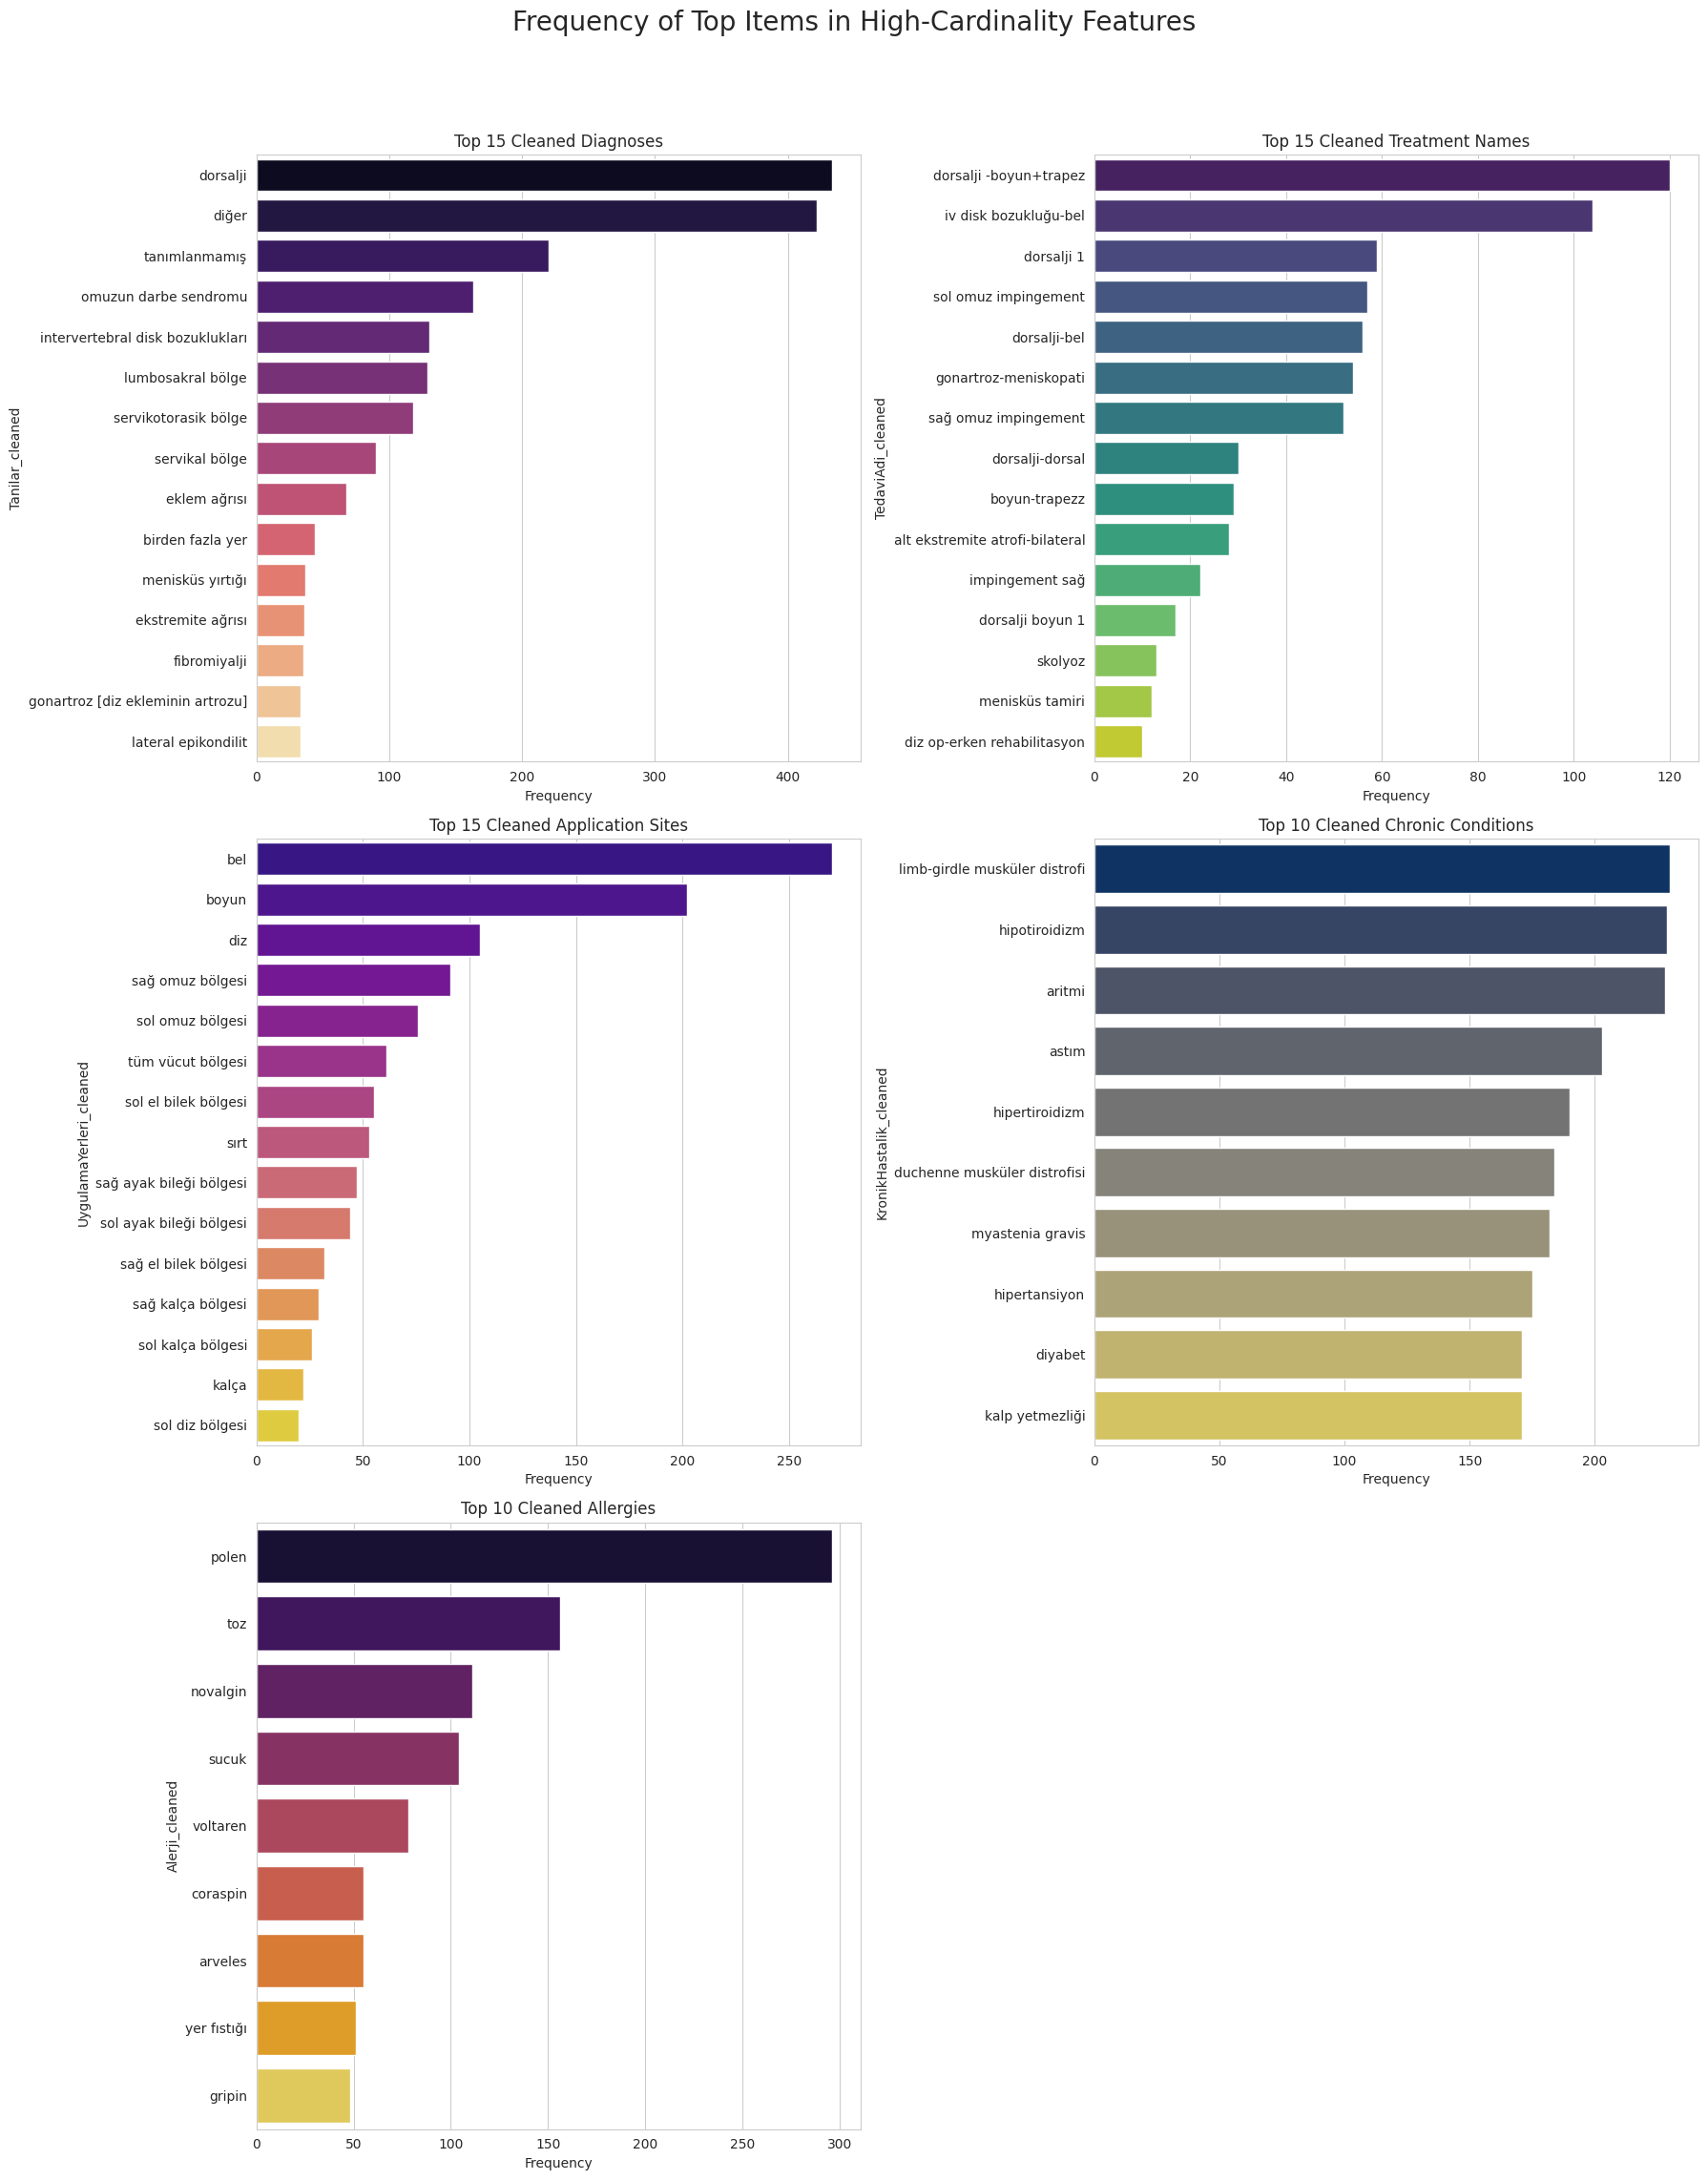

In [ ]:
# plotplotplotplotplot
fig, axes = plt.subplots(3, 2, figsize=(18, 24))
fig.suptitle('Frequency of Top Items in High-Cardinality Features', fontsize=20)

# Tanilar
sns.barplot(ax=axes[0, 0], x=top_tanilar.values, y=top_tanilar.index, palette='magma')
axes[0, 0].set_title('Top 15 Cleaned Diagnoses')
axes[0, 0].set_xlabel('Frequency')

# TedaviAdi
sns.barplot(ax=axes[0, 1], x=top_tedavi.values, y=top_tedavi.index, palette='viridis')
axes[0, 1].set_title('Top 15 Cleaned Treatment Names')
axes[0, 1].set_xlabel('Frequency')

# UygulamaYerleri
sns.barplot(ax=axes[1, 0], x=top_uygulama_yerleri.values, y=top_uygulama_yerleri.index, palette='plasma')
axes[1, 0].set_title('Top 15 Cleaned Application Sites')
axes[1, 0].set_xlabel('Frequency')

# KronikHastalik
sns.barplot(ax=axes[1, 1], x=top_kronik_hastalik.values, y=top_kronik_hastalik.index, palette='cividis')
axes[1, 1].set_title('Top 10 Cleaned Chronic Conditions')
axes[1, 1].set_xlabel('Frequency')

# Alerji
sns.barplot(ax=axes[2, 0], x=top_alerji.values, y=top_alerji.index, palette='inferno')
axes[2, 0].set_title('Top 10 Cleaned Allergies')
axes[2, 0].set_xlabel('Frequency')

axes[2, 1].set_visible(False)  # empty cell

plt.tight_layout(rect=[0, .03, 1, .95])
plt.show()

## Bivariate analysis

### Target val. vs Numerical features

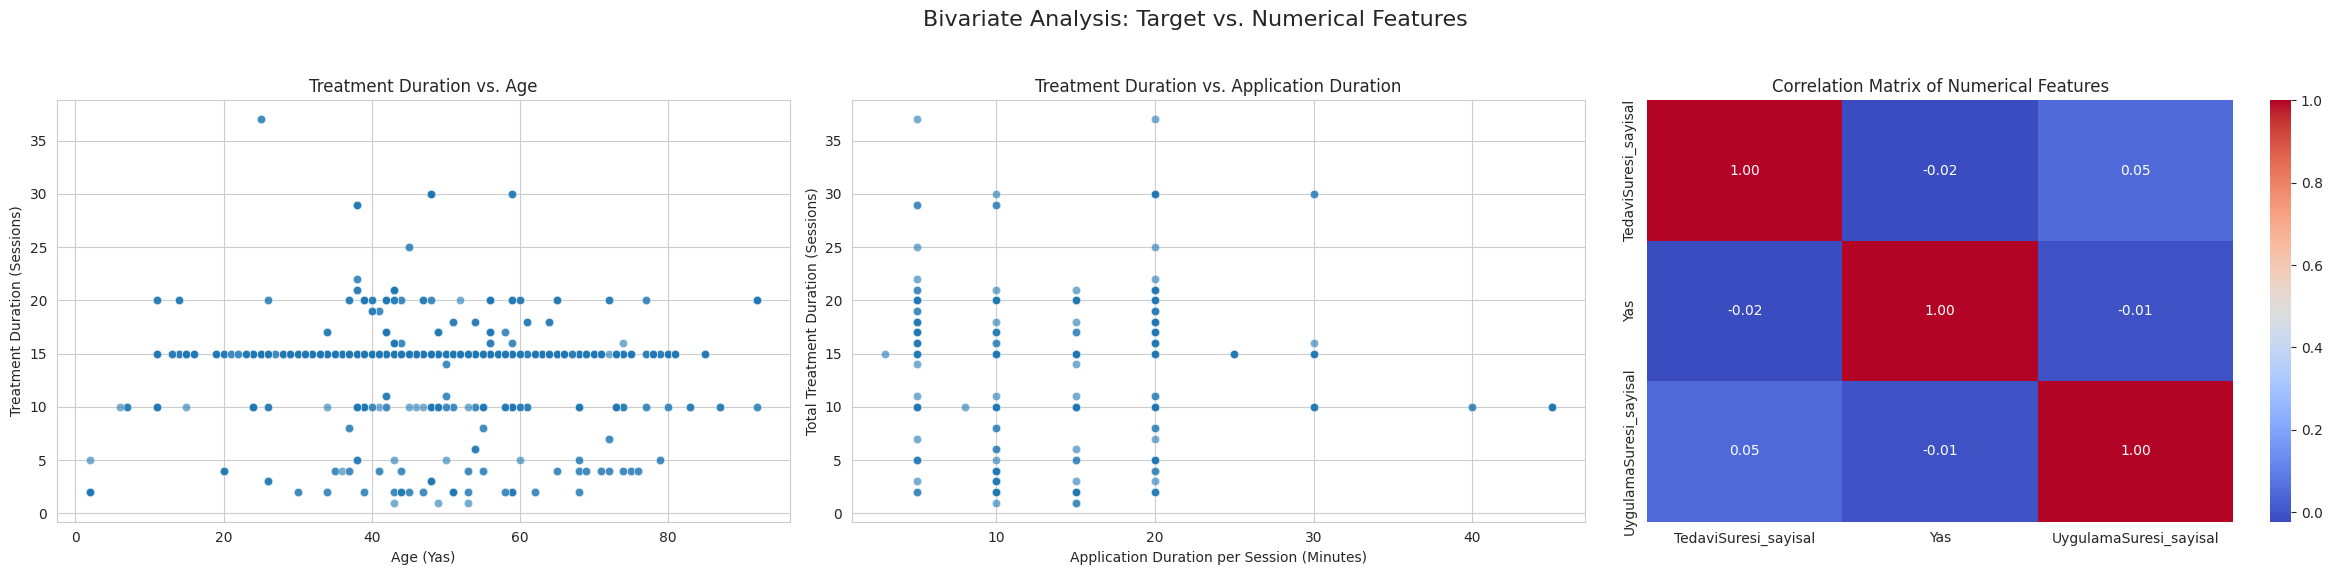

In [ ]:
# plot for three
plt.figure(figsize=(24, 6))
plt.suptitle('Bivariate Analysis: Target vs. Numerical Features', fontsize=16)

# yas
plt.subplot(1, 3, 1)
sns.scatterplot(x='Yas', y='TedaviSuresi_sayisal', data=df, alpha=0.6)
plt.title('Treatment Duration vs. Age')
plt.xlabel('Age (Yas)')
plt.ylabel('Treatment Duration (Sessions)')

# uygSuresi
plt.subplot(1, 3, 2)
sns.scatterplot(x='UygulamaSuresi_sayisal', y='TedaviSuresi_sayisal', data=df, alpha=0.6)
plt.title('Treatment Duration vs. Application Duration')
plt.xlabel('Application Duration per Session (Minutes)')
plt.ylabel('Total Treatment Duration (Sessions)')

# korelasyon
plt.subplot(1, 3, 3)
numerical_cols_for_corr = ['TedaviSuresi_sayisal', 'Yas', 'UygulamaSuresi_sayisal']
correlation_matrix = df[numerical_cols_for_corr].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Target val. vs Categorical features

simple categorical features: Cinsiyet, KanGrubu, Uyruk, and Bolum

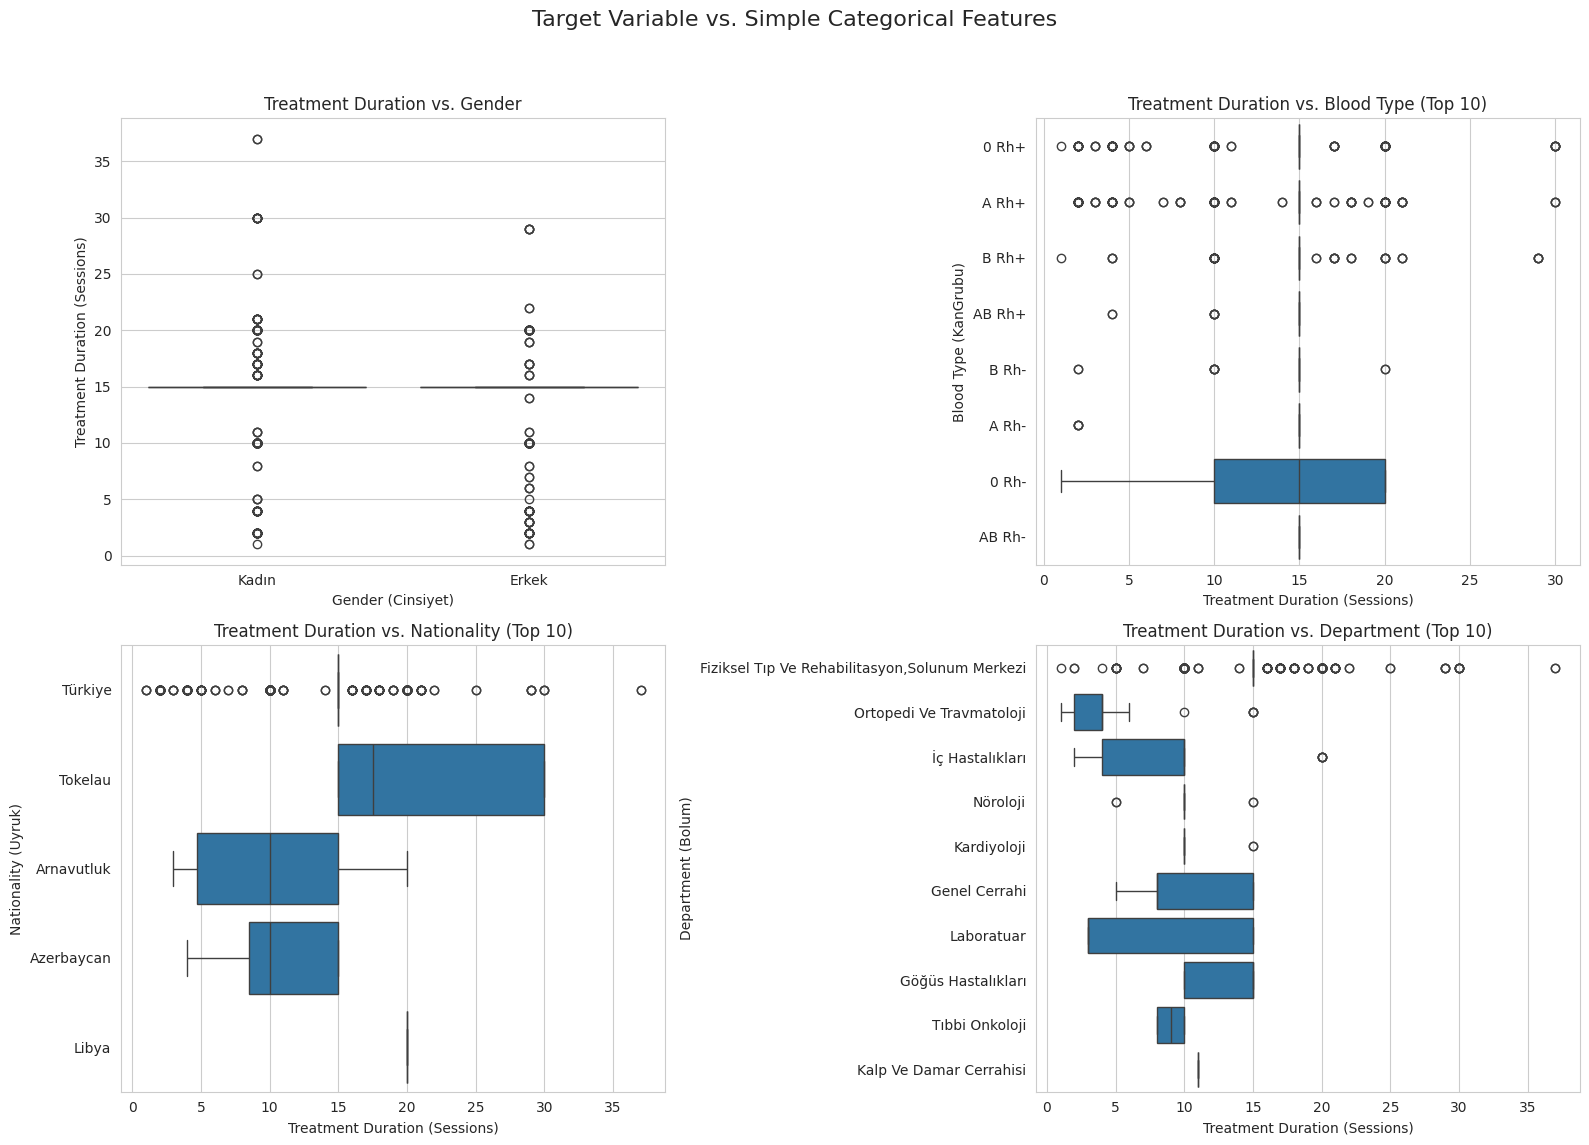

In [ ]:
# plot
plt.figure(figsize=(16, 12))
plt.suptitle('Target Variable vs. Simple Categorical Features', fontsize=16)

# cinsiyet
plt.subplot(2, 2, 1)
sns.boxplot(x='Cinsiyet', y='TedaviSuresi_sayisal', data=df)
plt.title('Treatment Duration vs. Gender')
plt.xlabel('Gender (Cinsiyet)')
plt.ylabel('Treatment Duration (Sessions)')

# kanGrubu
plt.subplot(2, 2, 2)
kan_grubu_order = df['KanGrubu'].value_counts().nlargest(10).index
sns.boxplot(y='KanGrubu', x='TedaviSuresi_sayisal', data=df, order=kan_grubu_order)
plt.title('Treatment Duration vs. Blood Type (Top 10)')
plt.ylabel('Blood Type (KanGrubu)')
plt.xlabel('Treatment Duration (Sessions)')

# uyruk
plt.subplot(2, 2, 3)
uyruk_order = df['Uyruk'].value_counts().nlargest(10).index
sns.boxplot(y='Uyruk', x='TedaviSuresi_sayisal', data=df, order=uyruk_order)
plt.title('Treatment Duration vs. Nationality (Top 10)')
plt.ylabel('Nationality (Uyruk)')
plt.xlabel('Treatment Duration (Sessions)')

# bolum
plt.subplot(2, 2, 4)
bolum_order = df['Bolum'].value_counts().nlargest(10).index
sns.boxplot(y='Bolum', x='TedaviSuresi_sayisal', data=df, order=bolum_order)
plt.title('Treatment Duration vs. Department (Top 10)')
plt.ylabel('Department (Bolum)')
plt.xlabel('Treatment Duration (Sessions)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

high-cardinality categorical features

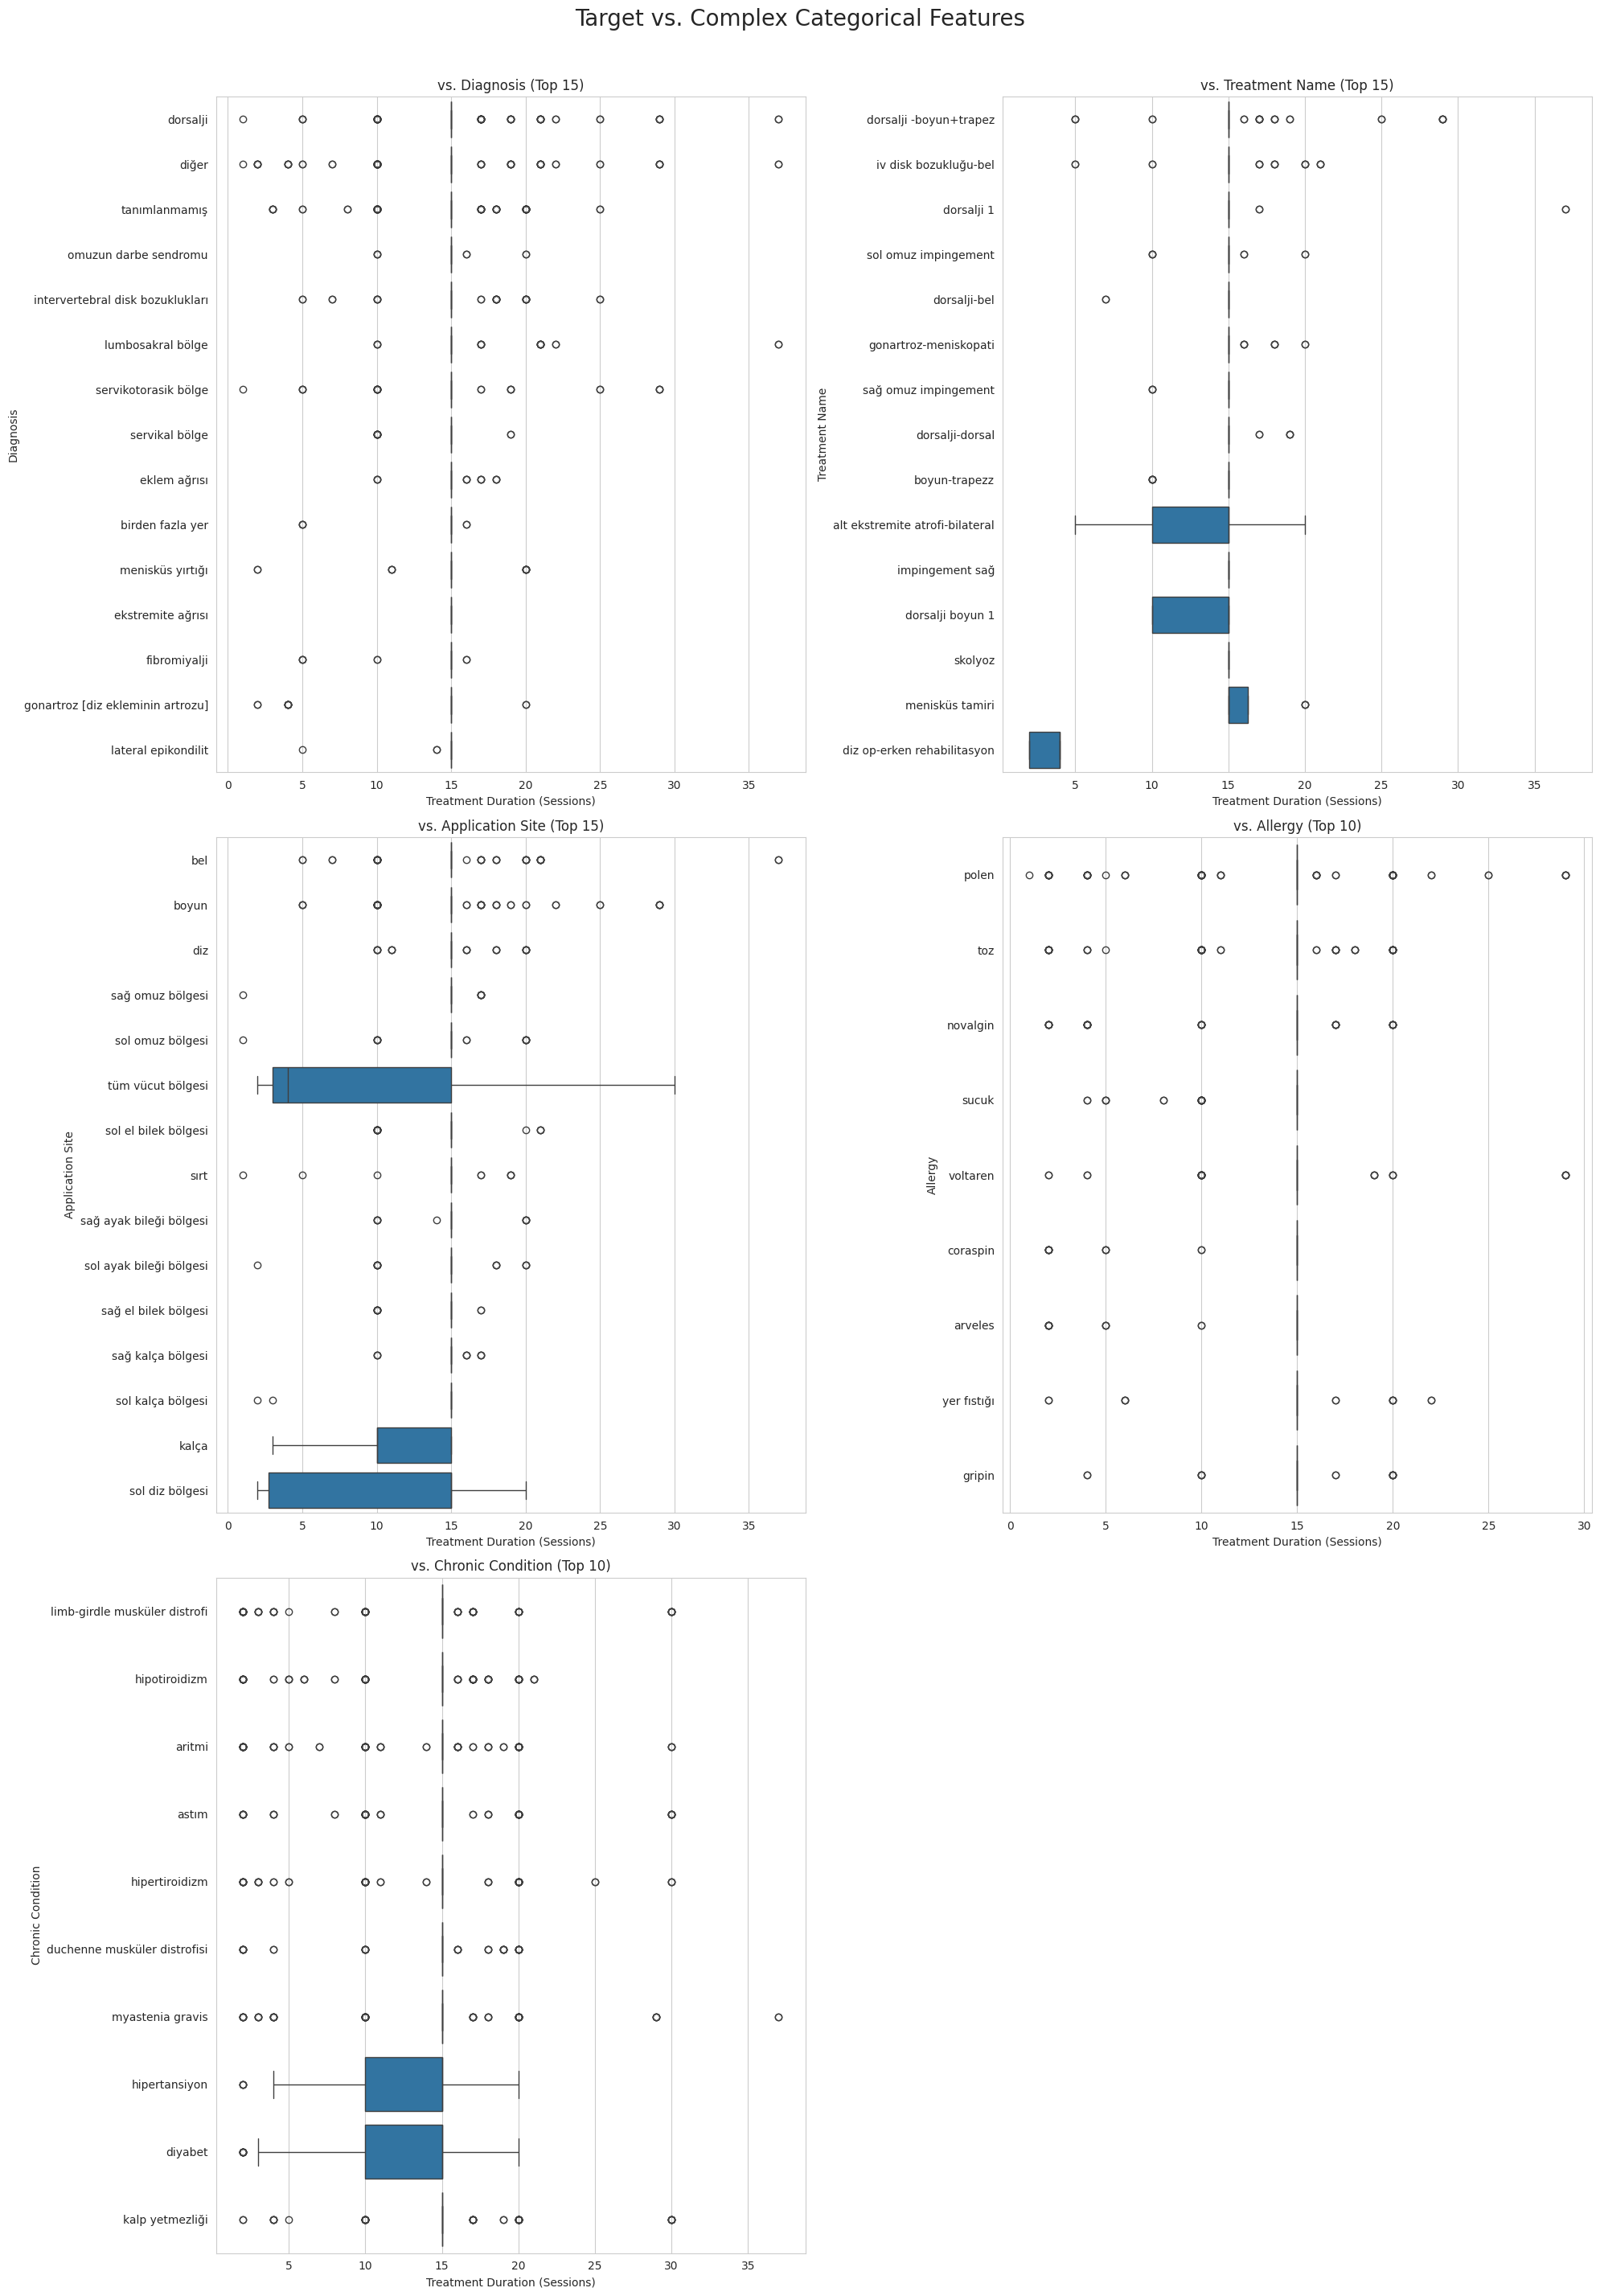

In [ ]:
#plot
fig, axes = plt.subplots(3, 2, figsize=(20, 30))
fig.suptitle('Target vs. Complex Categorical Features', fontsize=20)


# tanilar
top_15_diagnoses_list = top_tanilar.index
df_exploded_tanilar = df.assign(Tanilar_cleaned_single=df['Tanilar_cleaned'].str.split(',')).explode('Tanilar_cleaned_single')
df_exploded_tanilar['Tanilar_cleaned_single'] = df_exploded_tanilar['Tanilar_cleaned_single'].str.strip()
df_top_15_tanilar = df_exploded_tanilar[df_exploded_tanilar['Tanilar_cleaned_single'].isin(top_15_diagnoses_list)]
sns.boxplot(ax=axes[0, 0], x='TedaviSuresi_sayisal', y='Tanilar_cleaned_single', data=df_top_15_tanilar, order=top_15_diagnoses_list)
axes[0, 0].set_title('vs. Diagnosis (Top 15)')
axes[0, 0].set_xlabel('Treatment Duration (Sessions)')
axes[0, 0].set_ylabel('Diagnosis')


# tedaviAdi
top_15_tedavi_list = top_tedavi.index
df_exploded_tedavi = df.assign(TedaviAdi_cleaned_single=df['TedaviAdi_cleaned'].str.split(',')).explode('TedaviAdi_cleaned_single')
df_exploded_tedavi['TedaviAdi_cleaned_single'] = df_exploded_tedavi['TedaviAdi_cleaned_single'].str.strip()
df_top_15_tedavi = df_exploded_tedavi[df_exploded_tedavi['TedaviAdi_cleaned_single'].isin(top_15_tedavi_list)]
sns.boxplot(ax=axes[0, 1], x='TedaviSuresi_sayisal', y='TedaviAdi_cleaned_single', data=df_top_15_tedavi, order=top_15_tedavi_list)
axes[0, 1].set_title('vs. Treatment Name (Top 15)')
axes[0, 1].set_xlabel('Treatment Duration (Sessions)')
axes[0, 1].set_ylabel('Treatment Name')


# uygYerleri
top_15_uygulama_list = top_uygulama_yerleri.index
df_exploded_uygulama = df.assign(UygulamaYerleri_cleaned_single=df['UygulamaYerleri_cleaned'].str.split(',')).explode('UygulamaYerleri_cleaned_single')
df_exploded_uygulama['UygulamaYerleri_cleaned_single'] = df_exploded_uygulama['UygulamaYerleri_cleaned_single'].str.strip()
df_top_15_uygulama = df_exploded_uygulama[df_exploded_uygulama['UygulamaYerleri_cleaned_single'].isin(top_15_uygulama_list)]
sns.boxplot(ax=axes[1, 0], x='TedaviSuresi_sayisal', y='UygulamaYerleri_cleaned_single', data=df_top_15_uygulama, order=top_15_uygulama_list)
axes[1, 0].set_title('vs. Application Site (Top 15)')
axes[1, 0].set_xlabel('Treatment Duration (Sessions)')
axes[1, 0].set_ylabel('Application Site')


# alerji
top_10_alerji_list = top_alerji.index
df_exploded_alerji = df.assign(Alerji_cleaned_single=df['Alerji_cleaned'].str.split(',')).explode('Alerji_cleaned_single')
df_exploded_alerji['Alerji_cleaned_single'] = df_exploded_alerji['Alerji_cleaned_single'].str.strip()
df_top_10_alerji = df_exploded_alerji[df_exploded_alerji['Alerji_cleaned_single'].isin(top_10_alerji_list)]
sns.boxplot(ax=axes[1, 1], x='TedaviSuresi_sayisal', y='Alerji_cleaned_single', data=df_top_10_alerji, order=top_10_alerji_list)
axes[1, 1].set_title('vs. Allergy (Top 10)')
axes[1, 1].set_xlabel('Treatment Duration (Sessions)')
axes[1, 1].set_ylabel('Allergy')


# kornik
top_10_kronik_hastalik_list = top_kronik_hastalik.index
df_exploded_kronik = df.assign(KronikHastalik_cleaned_single=df['KronikHastalik_cleaned'].str.split(',')).explode('KronikHastalik_cleaned_single')
df_exploded_kronik['KronikHastalik_cleaned_single'] = df_exploded_kronik['KronikHastalik_cleaned_single'].str.strip()
df_top_10_kronik = df_exploded_kronik[df_exploded_kronik['KronikHastalik_cleaned_single'].isin(top_10_kronik_hastalik_list)]
sns.boxplot(ax=axes[2, 0], x='TedaviSuresi_sayisal', y='KronikHastalik_cleaned_single', data=df_top_10_kronik, order=top_10_kronik_hastalik_list)
axes[2, 0].set_title('vs. Chronic Condition (Top 10)')
axes[2, 0].set_xlabel('Treatment Duration (Sessions)')
axes[2, 0].set_ylabel('Chronic Condition')

axes[2, 1].set_visible(False)  # empty cell

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

# Second Phase: Data Preprocessing

## Data cleaning

### Missing values

In [ ]:
print("=== missing values for each column ===")
print(df.isnull().sum())

=== missing values for each column ===
HastaNo                      0
Yas                          0
Cinsiyet                   104
KanGrubu                   365
Uyruk                        0
KronikHastalik             345
Bolum                        7
Alerji                     540
Tanilar                     46
TedaviAdi                    0
TedaviSuresi                 0
UygulamaYerleri            157
UygulamaSuresi               0
TedaviSuresi_sayisal         0
UygulamaSuresi_sayisal       0
Tanilar_cleaned             46
TedaviAdi_cleaned            0
UygulamaYerleri_cleaned    157
KronikHastalik_cleaned     345
Alerji_cleaned             540
dtype: int64


In [ ]:
# column -> fillVal
# alerji, kronik -> yok
df['Alerji_cleaned'].fillna('yok', inplace=True)
df['KronikHastalik_cleaned'].fillna('yok', inplace=True)

# tanilar, uygYerleri -> mod
df['Tanilar_cleaned'].fillna(df['Tanilar_cleaned'].mode()[0], inplace=True)
df['UygulamaYerleri_cleaned'].fillna(df['UygulamaYerleri_cleaned'].mode()[0], inplace=True)

# cinsiyet, bolum -> mod
df['Cinsiyet'].fillna(df['Cinsiyet'].mode()[0], inplace=True)
df['Bolum'].fillna(df['Bolum'].mode()[0], inplace=True)

# kanGrubu -> bilinmiyor
df['KanGrubu'].fillna('bilinmiyor', inplace=True)

print("=== check missing vals after filling ===")  # verify
print(df.isnull().sum())

=== check missing vals after filling ===
HastaNo                      0
Yas                          0
Cinsiyet                     0
KanGrubu                     0
Uyruk                        0
KronikHastalik             345
Bolum                        0
Alerji                     540
Tanilar                     46
TedaviAdi                    0
TedaviSuresi                 0
UygulamaYerleri            157
UygulamaSuresi               0
TedaviSuresi_sayisal         0
UygulamaSuresi_sayisal       0
Tanilar_cleaned              0
TedaviAdi_cleaned            0
UygulamaYerleri_cleaned      0
KronikHastalik_cleaned       0
Alerji_cleaned               0
dtype: int64


/tmp/ipython-input-358116334.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Alerji_cleaned'].fillna('yok', inplace=True)
/tmp/ipython-input-358116334.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

### Addressing outliers

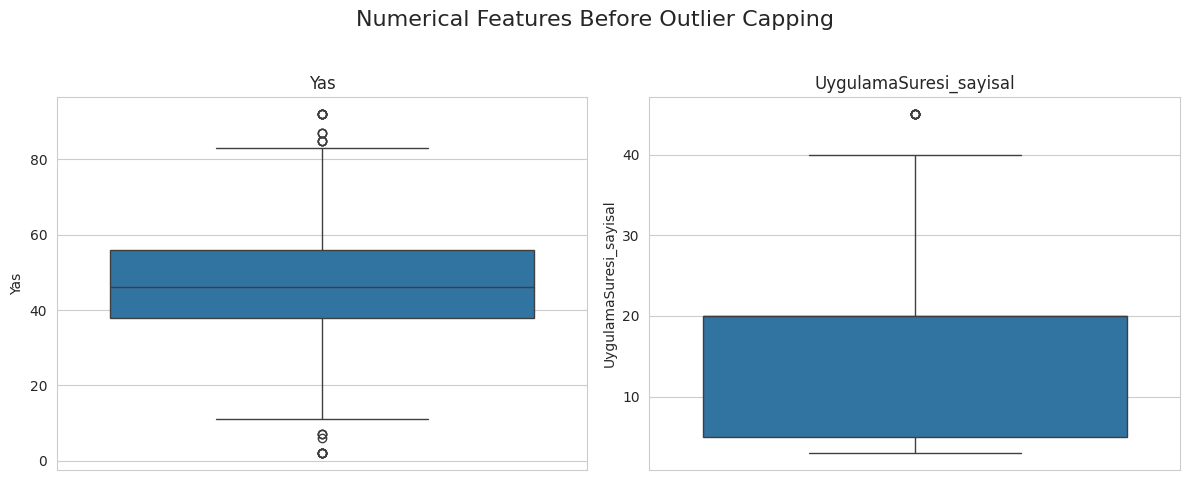

In [ ]:
# before
plt.figure(figsize=(12, 5))
plt.suptitle('Numerical Features Before Outlier Capping', fontsize=16)
numerical_features_to_cap = ['Yas', 'UygulamaSuresi_sayisal']

for i, col in enumerate(numerical_features_to_cap):
  plt.subplot(1, 2, i + 1)
  sns.boxplot(y=df[col])
  plt.title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

--- Capping Outliers using IQR Method ---
=> 25 outliers in 'Yas', capping them at the upper bound (83.0)...
=> 9 outliers in 'UygulamaSuresi_sayisal', capping them at the upper bound (42.5)...


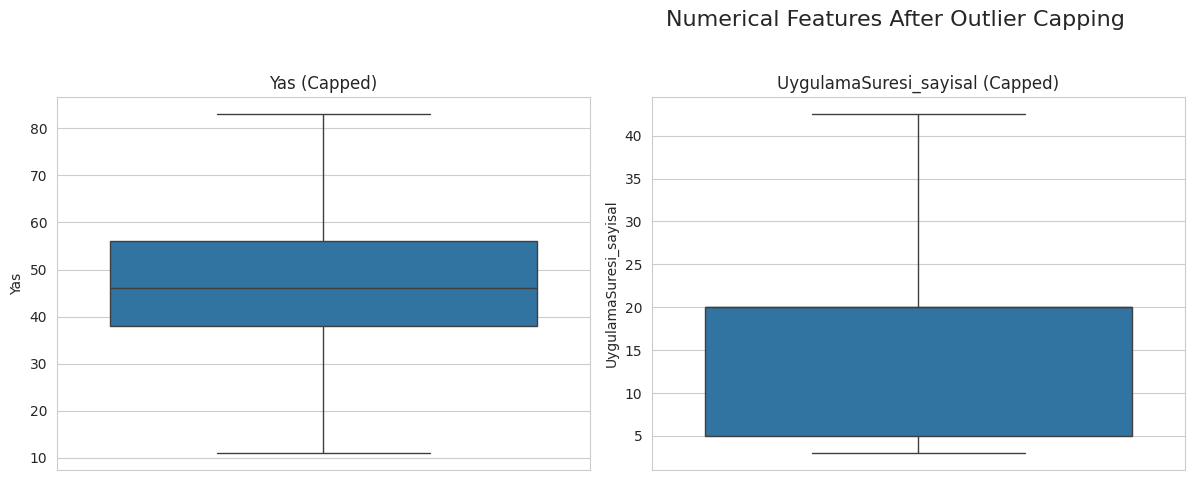

In [ ]:
# capping
print("--- Capping Outliers using IQR Method ---")
for col in numerical_features_to_cap:
  #IQR
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  if not outliers.empty:
    print(f"=> {len(outliers)} outliers in '{col}', capping them at the upper bound ({upper_bound})...")
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
  else:
    print(f"no outliers in '{col}'")


# after
plt.figure(figsize=(18, 5))
plt.suptitle('Numerical Features After Outlier Capping', fontsize=16)
for i, col in enumerate(numerical_features_to_cap):
  plt.subplot(1, 3, i + 1)
  sns.boxplot(y=df[col])
  plt.title(f"{col} (Capped)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Correcting data types

In [ ]:
# review
print("=== data types bef. correction ===")
print(df.info())

=== data types bef. correction ===
<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 2234
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HastaNo                  1307 non-null   int64  
 1   Yas                      1307 non-null   int64  
 2   Cinsiyet                 1307 non-null   object 
 3   KanGrubu                 1307 non-null   object 
 4   Uyruk                    1307 non-null   object 
 5   KronikHastalik           962 non-null    object 
 6   Bolum                    1307 non-null   object 
 7   Alerji                   767 non-null    object 
 8   Tanilar                  1261 non-null   object 
 9   TedaviAdi                1307 non-null   object 
 10  TedaviSuresi             1307 non-null   object 
 11  UygulamaYerleri          1150 non-null   object 
 12  UygulamaSuresi           1307 non-null   object 
 13  TedaviSuresi_sayisal     1307 non-null   int64  

In [ ]:
# not needed text columns
columns_to_drop = [
    'TedaviSuresi',
    'UygulamaSuresi',
    'KronikHastalik',
    'Alerji',
    'Tanilar',
    'TedaviAdi',
    'UygulamaYerleri'
]

df.drop(columns=columns_to_drop, inplace=True)
print("dropped original text columns")

dropped original text columns


In [ ]:
#print(df.info())

In [ ]:
# convert object to category dt
for col in df.select_dtypes(include=['object']).columns:
  df[col] = df[col].astype('category')

print("converted object to category type")

converted object to category type


In [ ]:
# after
print("=== data types AFTER correction ===")
print(df.info())

=== data types AFTER correction ===
<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   HastaNo                  1307 non-null   int64   
 1   Yas                      1307 non-null   int64   
 2   Cinsiyet                 1307 non-null   category
 3   KanGrubu                 1307 non-null   category
 4   Uyruk                    1307 non-null   category
 5   Bolum                    1307 non-null   category
 6   TedaviSuresi_sayisal     1307 non-null   int64   
 7   UygulamaSuresi_sayisal   1307 non-null   float64 
 8   Tanilar_cleaned          1307 non-null   category
 9   TedaviAdi_cleaned        1307 non-null   category
 10  UygulamaYerleri_cleaned  1307 non-null   category
 11  KronikHastalik_cleaned   1307 non-null   category
 12  Alerji_cleaned           1307 non-null   category
dtypes: category(9), float64(1), int6

## Feature engineering

### Parse comma-sep columns

In [ ]:
comma_flag = df['TedaviAdi_cleaned'].str.contains(',', na=False)  # bool flag to id rows with comma

if comma_flag.any():
  print("tedaviAdi contain comma-sep entries")
  print("\n" + "="*50 + "\n")
  print("Entries w comma-sep:")
  print(df.loc[comma_flag, 'TedaviAdi_cleaned'])
else:
  print("tedaviAdi only single entries")

tedaviAdi contain comma-sep entries


Entries w comma-sep:
122    diz menisküs, 
123    diz menisküs, 
291     diz menisküs,
292     diz menisküs,
Name: TedaviAdi_cleaned, dtype: category
Categories (235, object): ['1. parmak bağ ve volar plak yaralanması', '1. parmak cmc eklem ağrısı',
                           '5. metatars fissürü+bağ lezyonu', 'aksiller web sendromu+kontraktür', ...,
                           'yürüme eğitimi', 'çapraz bağ lezyonu', 'ön çapraz bağ rehabilitasyonu',
                           'öçb']


In [ ]:
# cleaning
df['TedaviAdi_cleaned'] = df['TedaviAdi_cleaned'].str.replace(',', '').str.strip()

# verify
print("\n" + "="*50 + "\n")
comma_flag = df['TedaviAdi_cleaned'].str.contains(',', na=False)  # bool flag to id rows with comma

if comma_flag.any():
  print("tedaviAdi contain comma-sep entries")
  print("\n" + "="*50 + "\n")
  print("Entries w comma-sep:")
  print(df.loc[comma_flag, 'TedaviAdi_cleaned'])
else:
  print("tedaviAdi only single entries")



tedaviAdi only single entries


count features

In [ ]:
# uygYerleri
df['Num_Uygulama_Yerleri'] = df['UygulamaYerleri_cleaned'].apply(lambda x: len(x.split(',')))

# kronik
df['Num_Kronik_Hastalik'] = df['KronikHastalik_cleaned'].apply(lambda x: 0 if x == 'yok' else len(x.split(',')))  # if yok -> 0

# alerji
df['Num_Alerji'] = df['Alerji_cleaned'].apply(lambda x: 0 if x == 'yok' else len(x.split(',')))  # if yok -> 0


# verify
print("=== _cleaned - new count features ===")
print(df[['UygulamaYerleri_cleaned', 'Num_Uygulama_Yerleri',
          'KronikHastalik_cleaned', 'Num_Kronik_Hastalik',
          'Alerji_cleaned', 'Num_Alerji']].head())

=== _cleaned - new count features ===
  UygulamaYerleri_cleaned  Num_Uygulama_Yerleri  \
0             ayak bileği                     1   
1                   boyun                     1   
2              boyun,sırt                     2   
3                   boyun                     1   
6                     bel                     1   

                              KronikHastalik_cleaned  Num_Kronik_Hastalik  \
0  becker musküler distrofisi, hipotiroidizm, kal...                    3   
1  duchenne musküler distrofisi, myastenia gravis...                    4   
2  duchenne musküler distrofisi, myastenia gravis...                    4   
3  duchenne musküler distrofisi, myastenia gravis...                    4   
6                                                yok                    0   

   Alerji_cleaned  Num_Alerji  
0             toz           1  
1             yok           0  
2             yok           0  
3             yok           0  
6  polen,novalgin           2  


one-hot encoding

In [ ]:
df['Num_Tanilar'] = df['Tanilar_cleaned'].apply(lambda x: 0 if x in ['yok', ''] else len(x.split(','))) # if yok -> 0, else split by comma


# has_

top_15_diagnoses_list = top_tanilar.index

for diagnosis in top_15_diagnoses_list:
  clean_col_name = "has_" + diagnosis.replace(' ', '_').replace('[', '').replace(']', '').replace('.', '')
  df[clean_col_name] = df['Tanilar_cleaned'].apply(lambda x: 1 if diagnosis in x else 0)

# verify
print("=== new features for tanilar ===")
new_tanilar_cols = ['Tanilar_cleaned', 'Num_Tanilar'] + df.columns.to_list()[-15:]
print(df[new_tanilar_cols].head())

=== new features for tanilar ===
                                     Tanilar_cleaned  Num_Tanilar  \
0         ayak bileği ve ayağın yüzeysel yaralanması            1   
1  omuzun darbe sendromu,dorsalji, diğer, serviko...            4   
2  omuzun darbe sendromu,dorsalji, diğer, serviko...            4   
3  omuzun darbe sendromu,dorsalji, diğer, serviko...            4   
6                            parapleji ve tetrapleji            1   

   has_dorsalji  has_diğer  has_tanımlanmamış  has_omuzun_darbe_sendromu  \
0             0          0                  0                          0   
1             1          1                  0                          1   
2             1          1                  0                          1   
3             1          1                  0                          1   
6             0          0                  0                          0   

   has_intervertebral_disk_bozuklukları  has_lumbosakral_bölge  \
0                            

In [ ]:
top_15_tedavi_list = top_tedavi.index  # use tedavi index

df['TedaviAdi_Top15'] = df['TedaviAdi_cleaned'].apply(lambda x: x if x in top_15_tedavi_list else 'Other')  # other for other than top 15

tedavi_dummies = pd.get_dummies(df['TedaviAdi_Top15'], prefix='TedaviAdi') # OHE

df = pd.concat([df, tedavi_dummies], axis=1)

df.drop(columns=['TedaviAdi_Top15'], inplace=True)  # drop


# verify
print("=== new features for tedaviAdi ===")
tedavi_cols_to_show = ['TedaviAdi_cleaned'] + [col for col in df.columns if 'TedaviAdi_' in col]
print(df[tedavi_cols_to_show].head())

=== new features for tedaviAdi ===
                 TedaviAdi_cleaned                TedaviAdi_cleaned  \
0                      ayak bileği                      ayak bileği   
1  dorsalji -boyun+trapez+skapular  dorsalji -boyun+trapez+skapular   
2  dorsalji -boyun+trapez+skapular  dorsalji -boyun+trapez+skapular   
3  dorsalji -boyun+trapez+skapular  dorsalji -boyun+trapez+skapular   
6                        parapleji                        parapleji   

   TedaviAdi_Other  TedaviAdi_alt ekstremite atrofi-bilateral  \
0             True                                      False   
1             True                                      False   
2             True                                      False   
3             True                                      False   
6             True                                      False   

   TedaviAdi_boyun-trapezz  TedaviAdi_diz op-erken rehabilitasyon  \
0                    False                                  False   
1        

In [ ]:
# for i in df.columns.to_list():
#   print(i)

### create bins/groups

In [ ]:
# yas
# bin_edges = [0, 18, 36, 56, 100]
# bin_labels = ['Adolescent', 'Young Adult', 'Adult', 'Senior']

# df['Yas_Group'] = pd.cut(df['Yas'], bins=bin_edges, labels=bin_labels, right=False)

# print("=== dist. of new age groups ===")
# print(df['Yas_Group'].value_counts())

# verify
# print("\n" + "=" * 50 + "\n")
# print("=== yas - yas_group ===")
# print(df[['Yas', 'Yas_Group']].head())

# yas
bin_edges = [0, 18, 36, 56, 100]
bin_labels = ['Adolescent', 'Young Adult', 'Adult', 'Senior']
df['Yas_Group'] = pd.cut(df['Yas'], bins=bin_edges, labels=bin_labels, right=False)
print("=== yas_group ===")
print(df['Yas_Group'].value_counts())


# classes for tedaviSuresi
def create_target_class(sessions):
  if sessions == 15.0:
    return '15_Seans'
  elif sessions == 10.0:
    return '10_Seans'
  elif sessions == 30.0:
    return '30_Seans'
  else:
    return 'Other'

df['TedaviSuresi_Class'] = df['TedaviSuresi_sayisal'].apply(create_target_class)
print("\n" + "=" * 50 + "\n")
print("=== tedaviSuresi_class ===")
print(df['TedaviSuresi_Class'].value_counts())


df.drop(columns=['TedaviSuresi_sayisal'], inplace=True)  # drop previous column

=== yas_group ===
Yas_Group
Adult          730
Senior         337
Young Adult    191
Adolescent      49
Name: count, dtype: int64


=== tedaviSuresi_class ===
TedaviSuresi_Class
15_Seans    938
Other       247
10_Seans    113
30_Seans      9
Name: count, dtype: int64


In [ ]:
for i in df.columns.to_list():
  print(i)

HastaNo
Yas
Cinsiyet
KanGrubu
Uyruk
Bolum
UygulamaSuresi_sayisal
Tanilar_cleaned
TedaviAdi_cleaned
UygulamaYerleri_cleaned
KronikHastalik_cleaned
Alerji_cleaned
Num_Uygulama_Yerleri
Num_Kronik_Hastalik
Num_Alerji
Num_Tanilar
has_dorsalji
has_diğer
has_tanımlanmamış
has_omuzun_darbe_sendromu
has_intervertebral_disk_bozuklukları
has_lumbosakral_bölge
has_servikotorasik_bölge
has_servikal_bölge
has_eklem_ağrısı
has_birden_fazla_yer
has_menisküs_yırtığı
has_ekstremite_ağrısı
has_fibromiyalji
has_gonartroz_diz_ekleminin_artrozu
has_lateral_epikondilit
TedaviAdi_Other
TedaviAdi_alt ekstremite atrofi-bilateral
TedaviAdi_boyun-trapezz
TedaviAdi_diz op-erken rehabilitasyon
TedaviAdi_dorsalji -boyun+trapez
TedaviAdi_dorsalji 1
TedaviAdi_dorsalji boyun 1
TedaviAdi_dorsalji-bel
TedaviAdi_dorsalji-dorsal
TedaviAdi_gonartroz-meniskopati
TedaviAdi_impingement sağ
TedaviAdi_iv disk bozukluğu-bel
TedaviAdi_menisküs tamiri
TedaviAdi_sağ omuz impingement
TedaviAdi_skolyoz
TedaviAdi_sol omuz impingement
Y

## Feature transformation and encoding

### Categorical variable encoding

In [ ]:
# simple categorical feats
categorical_cols_to_encode = [
    'Cinsiyet',
    'KanGrubu',
    'Uyruk',
    'Bolum',
    'Yas_Group'
]

# OHE
print("=== OHE to simple categorical feats ===")

df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

final_text_cols_to_drop = [
    'Tanilar_cleaned',
    'TedaviAdi_cleaned',
    'UygulamaYerleri_cleaned',
    'KronikHastalik_cleaned',
    'Alerji_cleaned'
]

df_final = df_encoded.drop(columns=final_text_cols_to_drop)

print("done")

=== OHE to simple categorical feats ===
done


In [ ]:
# verify
print("\n" + "=" * 50 + "\n")
print("=== final dataframe ===")
df_final.info()



=== final dataframe ===
<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 2234
Data columns (total 64 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   HastaNo                                    1307 non-null   int64  
 1   Yas                                        1307 non-null   int64  
 2   UygulamaSuresi_sayisal                     1307 non-null   float64
 3   Num_Uygulama_Yerleri                       1307 non-null   int64  
 4   Num_Kronik_Hastalik                        1307 non-null   int64  
 5   Num_Alerji                                 1307 non-null   int64  
 6   Num_Tanilar                                1307 non-null   int64  
 7   has_dorsalji                               1307 non-null   int64  
 8   has_diğer                                  1307 non-null   int64  
 9   has_tanımlanmamış                          1307 non-null   int64  
 10  has

### Numerical feature scaling

In [ ]:
# dropped original yas
if 'Yas' in df_final.columns:
  df_final.drop(columns=['Yas'], inplace=True)
  print("Dropped the original 'Yas' column.")

Dropped the original 'Yas' column.


In [ ]:
# num columns to sclae
cols_to_scale = [
    'UygulamaSuresi_sayisal',
    'Num_Uygulama_Yerleri',
    'Num_Kronik_Hastalik',
    'Num_Alerji',
    'Num_Tanilar'
]

print(f"\nscaling columns: {cols_to_scale}")


scaling columns: ['UygulamaSuresi_sayisal', 'Num_Uygulama_Yerleri', 'Num_Kronik_Hastalik', 'Num_Alerji', 'Num_Tanilar']


In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize features by removing the mean and scaling to unit variance. (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

scaler = StandardScaler()

In [ ]:
df_final[cols_to_scale] = scaler.fit_transform(df_final[cols_to_scale])  # scale!

print("=== scaled features ===")
print(df_final[cols_to_scale].describe())

=== scaled features ===
       UygulamaSuresi_sayisal  Num_Uygulama_Yerleri  Num_Kronik_Hastalik  \
count            1.307000e+03          1.307000e+03         1.307000e+03   
mean            -8.494438e-17          1.929936e-16         5.164618e-17   
std              1.000383e+00          1.000383e+00         1.000383e+00   
min             -1.576752e+00         -2.055839e-01        -1.260345e+00   
25%             -1.298123e+00         -2.055839e-01        -1.260345e+00   
50%              7.916006e-01         -2.055839e-01         8.326911e-02   
75%              7.916006e-01         -2.055839e-01         7.550760e-01   
max              3.926185e+00          4.864193e+00         1.426883e+00   

         Num_Alerji   Num_Tanilar  
count  1.307000e+03  1.307000e+03  
mean  -2.446398e-17  1.440657e-16  
std    1.000383e+00  1.000383e+00  
min   -1.049950e+00 -9.094941e-01  
25%   -1.049950e+00 -9.094941e-01  
50%    3.885037e-01 -3.324510e-01  
75%    3.885037e-01  2.445921e-01  
max

In [ ]:
scaled_describe = df_final[cols_to_scale].describe()

print("=== scaled features (no scientific notation) ===")
scaled_describe.style.format('{:.2f}')

=== scaled features (no scientific notation) ===


,UygulamaSuresi_sayisal,Num_Uygulama_Yerleri,Num_Kronik_Hastalik,Num_Alerji,Num_Tanilar
count,1307.00,1307.00,1307.00,1307.00,1307.00
mean,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.58,-0.21,-1.26,-1.05,-0.91
25%,-1.30,-0.21,-1.26,-1.05,-0.91
50%,0.79,-0.21,0.08,0.39,-0.33
75%,0.79,-0.21,0.76,0.39,0.24
max,3.93,4.86,1.43,1.83,6.02


labelEncoding for target val

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_final['TedaviSuresi_Encoded'] = le.fit_transform(df_final['TedaviSuresi_Class'])

print("=== mapping of encode ===")
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

df_final.drop(columns=['TedaviSuresi_Class'], inplace=True)  # drop class

print("\n=== final target val column === ")
print(df_final[['TedaviSuresi_Encoded']].head())

=== mapping of encode ===
{'10_Seans': np.int64(0), '15_Seans': np.int64(1), '30_Seans': np.int64(2), 'Other': np.int64(3)}

=== final target val column === 
   TedaviSuresi_Encoded
0                     3
1                     1
2                     1
3                     1
6                     0


# Export final dataset

In [ ]:
output_excel_path = 'model_ready_data.xlsx'

df_final.to_excel(output_excel_path, index=False)
print("saved")

saved
